**Solving differential equations in python**
============================================================

Control theory is the science of analyzing and modifying ("controlling") the behavior of dynamic systems. Dynamic systems can be described via differential equations in the general form of

$\dot{x} = f(x, u)$ 

with $x$ being the state variables and $u$ the external system inputs. An example related to the control tasks presented in the lecture are the longitudinal motion dynamics of an autonomous vehicle

$\dot{v} = \frac{F_x}{m} - \frac{c_d}{m}v^2$

with $v$ being the velocity, $F_x$ the applied longitudinal force, $m$ the vehicle mass and $c_d$ the lumped drag  coefficient (including the air density, the aerodynamic reference area and the factor 1/2). We will now take a closer look on how to solve this equation for different input sequences $F_x$ in python. 

The differential equation for the system shows us the following things: 

There is **one state variable**: the velocity $v$

There is **one input variable**: the external force $F_x$

There are **two parameters**: The vehicle mass $m$ and the lumped drag coefficient $c_d$

Prior to solving the differential equation we have to initialize the parameters, the external inputs and the time vector. 

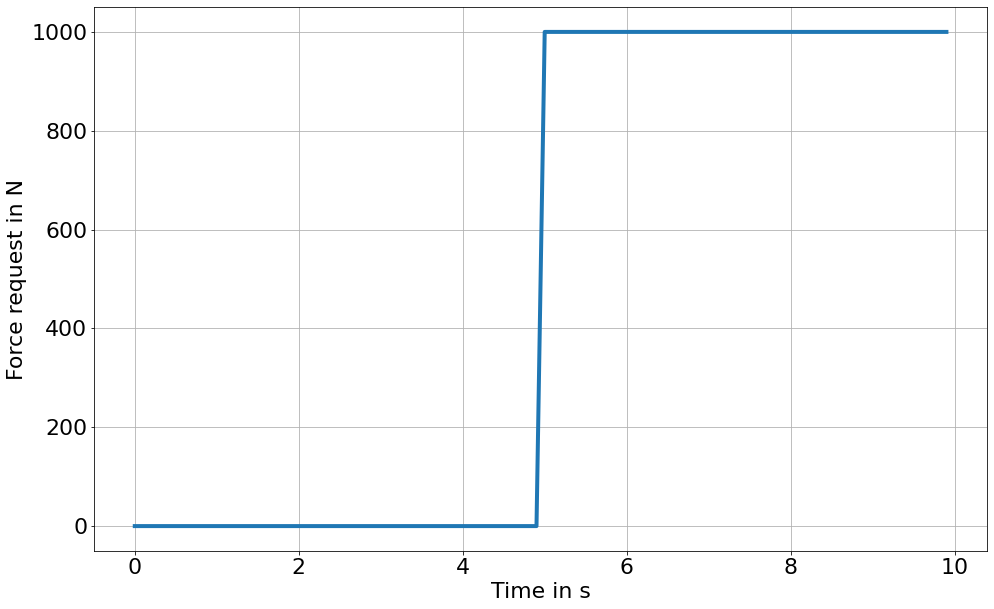

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
ratio = [16, 10]
linewidth = 4
plt.rcParams["figure.figsize"] = ratio
plt.rcParams.update({"font.size": 22})

# step size in seconds
tS = 0.1
# number of steps
N = 100
# the resulting length of the solution equals tS*(N-1) seconds
t = np.arange(0, tS*N, tS)
# vehicle mass
mass = 1200
# lumped drag coefficient 
cd = 0.45

# specify the external force input (0N for the first five seconds and 1000N for the rest of the horizon)
Fx = np.hstack((np.full(int(N/2), 0), np.full(int(N/2), 1000)))
plt.plot(t, Fx, linewidth = linewidth)
plt.grid()
plt.xlabel('Time in s')
plt.ylabel('Force request in N')
plt.show()

We now have to apply a numerical solving scheme to the differential equation using the information defined previously. There are different schemes available such as **Forward Euler** or **Runge-Kutta** schemes of different order. The first is popular in applications due to its simple implementation. The second is more complicated to implement but leads to more accurate results. 

Usually its sufficient to start with a simple scheme and switch to a more sophisticated one if required. Another good strategy to increase the accuracy of the results is to use smaller timesteps. 

**Side note:** Simulink also allows to use these two schemes. They are named **ode1** (Forward Euler) and **ode4** (Runge-Kutta 4th order). The names originate from the *numerical order* of the schemes. It describes how fast the error of the integration converges to zero when the timestamp is reduced.  

We will use **Euler Forward** in this exercise. The basic idea here is simple: Assume that the derivative is constant for a certain timestep and add it to the previous value of the state. In mathematical notation this can be written as: 

$x(k+1) = x(k) + \Delta T \dot{x}(k) = x(k) + \Delta T f(x(k), u(k))$

To implement this recursive formula we also need an initial condition $x(0)$ for the differential equation at the time instance 0. Using this, we can start to apply the scheme and calculate the solution in an iterative manner: 

$x(1) = x(0) + \Delta T f(x(0), u(0))$

$x(2) = x(1) + \Delta T f(x(1), u(1))$

$x(3) = x(2) + \Delta T f(x(2), u(2))$

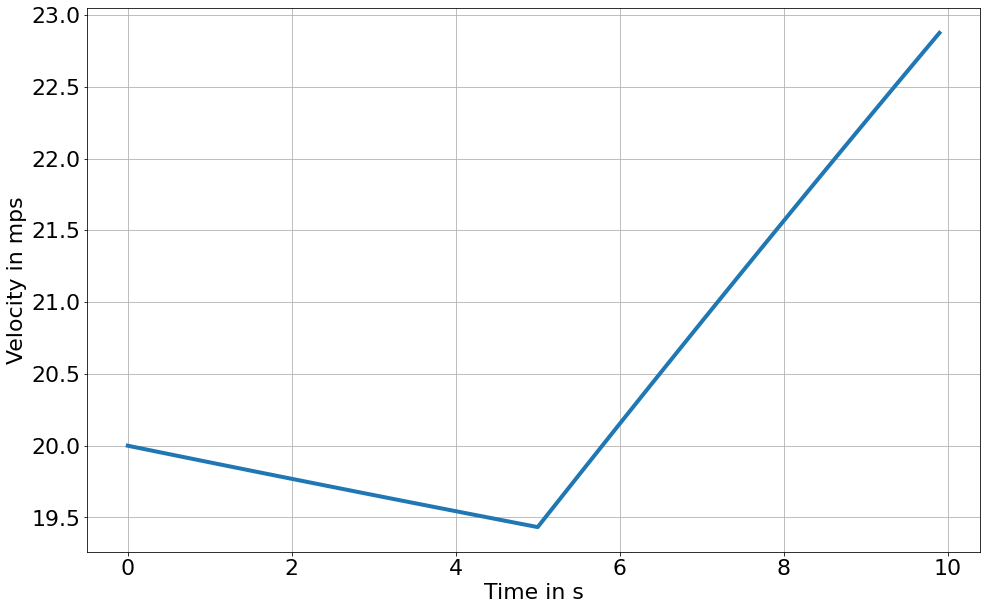

In [8]:
# initialize the solution with all zeros
v = np.zeros(N)
# specify the initial condition with a certain speed
v[0] = 20

# we will now determine the solution to the differential equation specified above 
for i in range(1, v.shape[0]): 
    # apply euler forward integration (x(k+1) = x(k) + tS*d_x(k))
    v[i] = v[i-1] + tS*(Fx[i-1]/mass - cd/mass*v[i-1]**2)
    
# visualize solution 
plt.plot(t, v, linewidth = linewidth)
plt.grid()
plt.xlabel('Time in s')
plt.ylabel('Velocity in mps')
plt.show()

We have seen how to handle a scalar differential equation for the velocity dynamics of an autonomous vehicle. This can now be extended to a more sophistcated example, with the velocity as well as the position dynamics along the longitudinal motion axis. The required differential equations are the following: 

$\dot{v} = \frac{F_x}{m} - \frac{c_d}{m}v^2$

$\dot{s} = v$

with $s$ being the position along the longitudinal coordinate frame. 

We can now apply a similar procedure as for the scalar differential equation to solve this system of differential equations: 

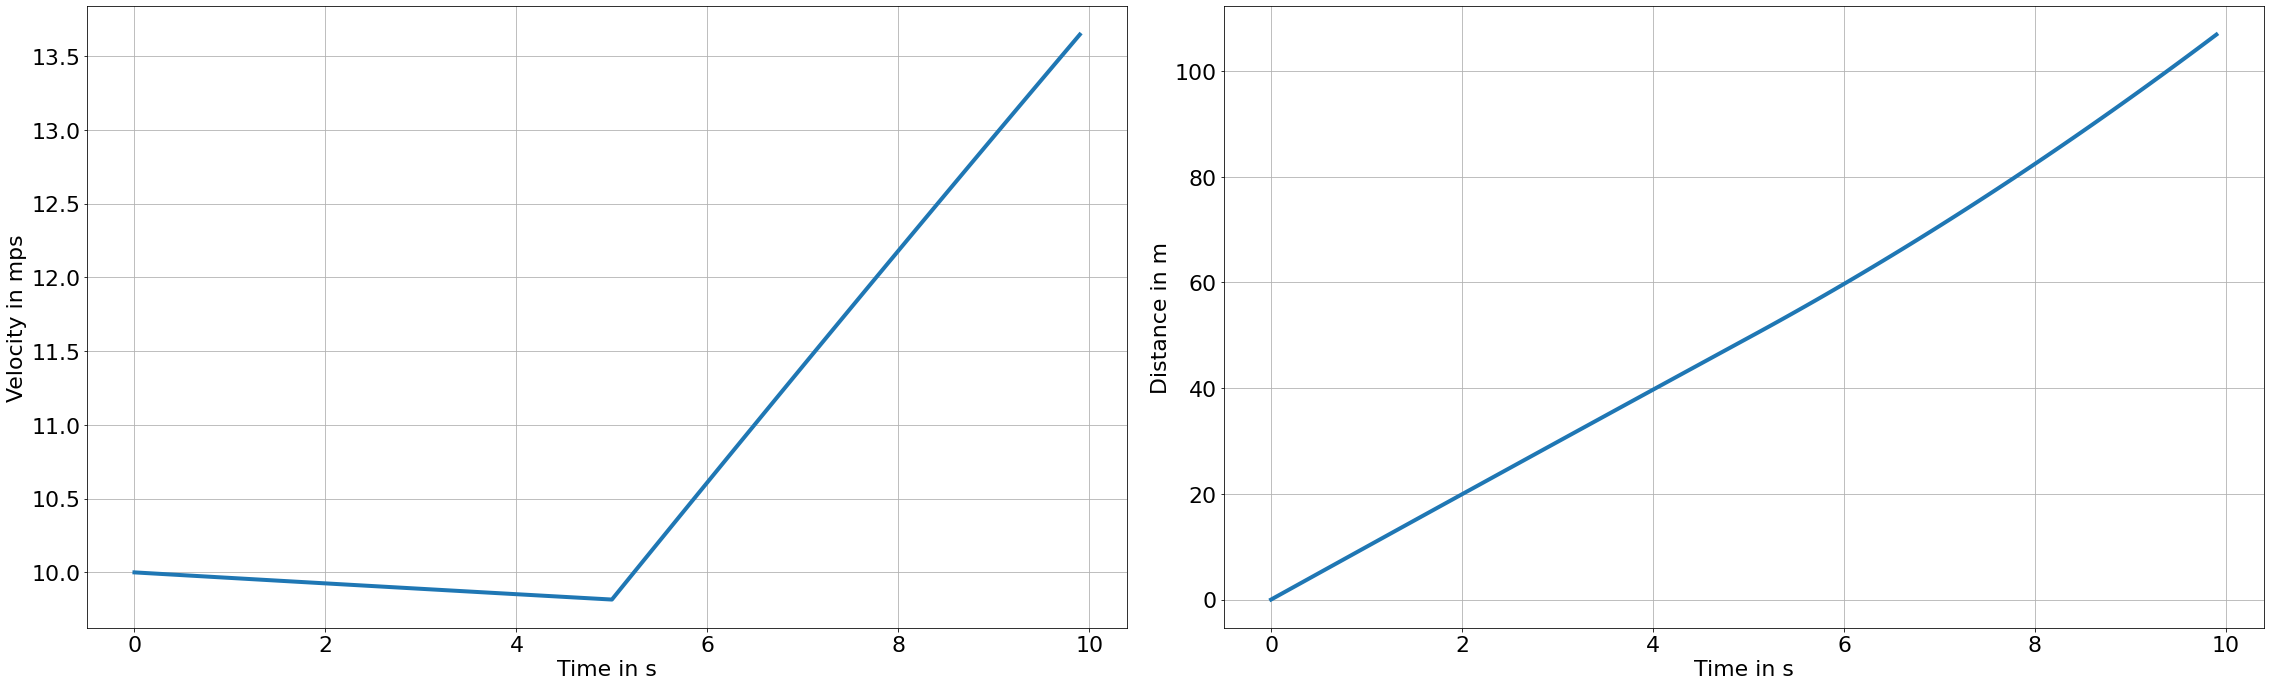

In [15]:
# now we add the position dynamics 

# clear the solution with all zeros
v = np.zeros(N)
s = np.zeros(N)
# specify the initial condition with a certain speed
v[0] = 10
s[0] = 0

# solve the differential equation with euler forward and apply the same input as above 
for i in range(1, v.shape[0]): 
    # apply euler forward integration (x(k+1) = x(k) + tS*d_x(k))
    # to the velocity dynamics
    v[i] = v[i-1] + tS*(Fx[i-1]/mass - cd/mass*v[i-1]**2)
    # apply euler forward integration to the position dynamics 
    s[i] = s[i-1] + tS*v[i-1]

# visualize solution 
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(32,10))
ax1.plot(t, v, linewidth = linewidth)
ax1.set_xlabel('Time in s')
ax1.set_ylabel('Velocity in mps')
ax1.grid()
ax2.plot(t, s, linewidth = linewidth)
ax2.set_xlabel('Time in s')
ax2.set_ylabel('Distance in m')
ax2.grid()
plt.tight_layout() 
plt.show()